## Project - Applying Data Science Methodology on Red Wine Quality Dataset

<img src="https://media.giphy.com/media/jRuv9xc10lVyE/giphy.gif">

You can read more about the Data Science Methodology from this [IBM whitepaper](https://tdwi.org/~/media/64511A895D86457E964174EDC5C4C7B1.PDF) by John Rollins

[Link](https://archive.ics.uci.edu/ml/datasets/wine+quality) for the dataset for context

<img src="https://media-exp1.licdn.com/dms/image/C4D12AQGOPVf5iqhhwQ/article-inline_image-shrink_1000_1488/0/1597756152693?e=1652918400&v=beta&t=iKZ2jX3khsx11lD9JyZWDz-j-Gt2hZsKPXz5rZ0iE1M">

### Business Understanding

The red wine industry shows a recent exponential growth as social drinking is on the rise. Nowadays, industry players are using product quality certifications to promote their products. This is a time-consuming process and requires the assessment given by human experts, which makes this process very expensive. Also, the price of red wine depends on a rather abstract concept of wine appreciation by wine tasters, opinion among whom may have a high degree of variability. Another vital factor in red wine certification and quality assessment is physicochemical tests, which are laboratory-based and consider factors like acidity, pH level, sugar, and other chemical properties. The red wine market would be of interest if the human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled.

The goal is to implement Regression Models and Classification Models on the Red Wine Quality Dataset to determine which features are the best quality red wine indicators and generate insights into each of these factors to our model’s red wine quality.

### Analytic Approach
Based on the above business understanding one should decide the analytical approach to follow. The approaches can be of 4 types: Descriptive approach (current status and information provided), Diagnostic approach(a.k.a statistical analysis, what is happening and why it is happening), Predictive approach(it forecasts on the trends or future events probability) and Prescriptive approach( how the problem should be solved actually).

**Q1. What is the analytical approach that you would take for this project? Why do you think its the right approach?**

Diagnostic analytics should be used to approach this project. From the business understanding, the goal is to have "human quality of tasting can be related to wine’s chemical properties so that certification and quality assessment and assurance processes are more controlled." This is the right approach because the goal is trying to replace human subjective scoring to real measurable values. Therefor, through statistics and data, a model can be made to relate wine’s chemical properties for certification and quality assessment and assurance processes.

### Data Requirements

**Q2. What kind of data do we require for predicting the red wine quality and for determining the features that are the best quality red wine indicators?**

#### Description of Qualities
1-11 Input variables (based on physicochemical tests) and Output variable (based on sensory data):
1. Fixed acidity: are non-volatile acids that do not evaporate easily
2. Volatile acidity: acetic acid content leads to an unpleasant vinegar taste
3. Citric Acid: preservative (adds freshness and flavour to wines)
4. Residual sugar: sugar remaining after fermentation stops
5. Chlorides: amount salt in wine
6. Free Sulfur Dioxide: preservative to prevent oxidation and microbial spoilage
7. Total Sulfur Dioxide: amount SO2 in wine including the free SO2
8. Density: density can be compared to baseline of pure water
9. pH: the level of acidity
10. Sulphates: a wine additive that contributes to SO2 levels
11. Alcohol: percent amount alcohol in wine
12. Quality: (score between 0 and 10) - sensory data

With the qualities listed above, no single quality can be assumed to be the best quality red wine indicator as it should and ultimately be a combination of all factors. However, chlorides, residual sugar, pH could be strong indicators of the intended flavour profile, while the preservatives,Sulfur Dioxide, could alter that intended flavour for better or worse.

### Data Collection

**Q3. From where do we get our data?**

The data used is a Red Wine Data Set publicly available on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wine+quality). This data is obtained from sampling on red "Vinho Verde" wine from north of Portugal. There are 11 physicochemical variables recorded and a human labeled "quality" graded from 0 to 10 for a total of 1599 entries in the data set.

In [1379]:
import warnings
warnings.simplefilter("ignore")

import numpy as np
import pandas as pd
import seaborn as sn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import  precision_score, recall_score, accuracy_score

import keras.layers
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense

from datetime import time

from matplotlib import pyplot
%matplotlib inline

df_wine = pd.read_csv('winequality-red.csv')
features = df_wine.drop(['quality'], axis=1)
df_wine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

### Data Understanding

Link for the dataset https://archive.ics.uci.edu/ml/datasets/wine+quality for context

**Q4. From where are red wine samples obtained?**

The red vinho verde wine samples are from the north of Portugal

**Q5. How can knowing the impact of each variable on the red wine quality help businesses(producers, distributors, etc) ?**

For producers, knowing the impact of each variable on the red wine quality can help tailor their to the customer and latest trends. For example, citric flavour wines are gaining popularity and the Citric Acid and residual sugar levels can be monitored to create that fresh sweetness the trendy customers desire. And even beyond making new wines, maintaining the consistency of a wine with the variables will also matter as potential ingredient alterations due to supply or natural causes can help adjust the profile to better match the original wine.

For distributors and vendors, knowing what wines to purchase into inventory is important. You do not want to be selling inventory that no one will buy and hold that inventory forever.Inventory needs to move fast. Even more importantly, is selling items with healthy profits and exclusivity to draw customers.

For the customer, mainly it will be from marketing placebo. Some wine company is going to claim their wine is the healthiest based of the pH level. the variables are generally to specific for the customer and would primarily be sold through word of mouth or particular flavour desires.


As stated above, 1599 data entries for 12 different variables.

In [1380]:
df_wine.shape

(1599, 12)

All float data types but int for the quality.

In [1381]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Data Preparation

#### Explore the dataset further
*TODO*
<li>Check the distribution of data using histograms</li>

No null values found. So there will be no filling with missingno

In [1382]:
df_wine.isnull().sum().to_frame('nulls')

nulls
fixed acidity             0
volatile acidity          0
citric acid               0
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0

Seems the labeled quality of the wine is mediocre with a lot of concentration of 5's and 6's as the given quality rating.

<AxesSubplot:xlabel='quality', ylabel='count'>

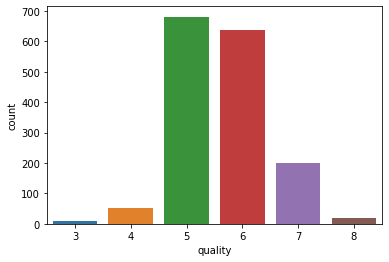

In [1383]:
#distribution of data using histograms
sn.countplot(x='quality', data=df_wine)

Observing the box plots below, there is significant variance amongst the different quality of wine. However, these outliers should not be removed as they are assumed to be non-natural outliers and should be accounted for the models.

[Text(0.5, 0, 'quality'),
 Text(0, 0.5, 'alcohol'),
 Text(0.5, 1.0, 'alcohol/quality Distribution')]

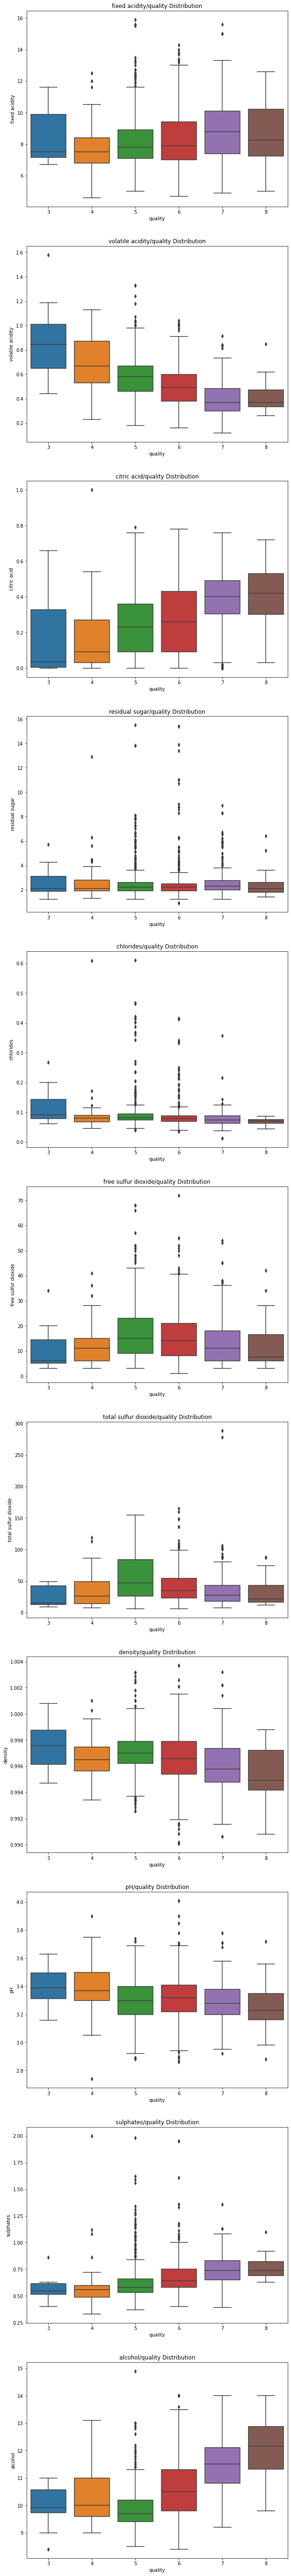

In [1384]:
# Outliers detection
fig, axes = pyplot.subplots(nrows=11, ncols=1)
fig.set_size_inches(10, 100)
sn.boxplot(data=df_wine, y="fixed acidity", x="quality", orient="v", ax=axes[0])
sn.boxplot(data=df_wine, y="volatile acidity", x="quality", orient="v", ax=axes[1])
sn.boxplot(data=df_wine, y="citric acid", x="quality", orient="v", ax=axes[2])
sn.boxplot(data=df_wine, y="residual sugar", x="quality", orient="v", ax=axes[3])
sn.boxplot(data=df_wine, y="chlorides", x="quality", orient="v", ax=axes[4])
sn.boxplot(data=df_wine, y="free sulfur dioxide", x="quality", orient="v", ax=axes[5])
sn.boxplot(data=df_wine, y="total sulfur dioxide", x="quality", orient="v", ax=axes[6])
sn.boxplot(data=df_wine, y="density", x="quality", orient="v", ax=axes[7])
sn.boxplot(data=df_wine, y="pH", x="quality", orient="v", ax=axes[8])
sn.boxplot(data=df_wine, y="sulphates", x="quality", orient="v", ax=axes[9])
sn.boxplot(data=df_wine, y="alcohol", x="quality", orient="v", ax=axes[10])

axes[0].set(xlabel='quality', ylabel='fixed acidity', title="fixed acidity/quality Distribution")
axes[1].set(xlabel='quality', ylabel='volatile acidity', title="volatile acidity/quality Distribution")
axes[2].set(xlabel='quality', ylabel='citric acid', title="citric acid/quality Distribution")
axes[3].set(xlabel='quality', ylabel='residual sugar', title="residual sugar/quality Distribution")
axes[4].set(xlabel='quality', ylabel='chlorides', title="chlorides/quality Distribution")
axes[5].set(xlabel='quality', ylabel='free sulfur dioxide', title="free sulfur dioxide/quality Distribution")
axes[6].set(xlabel='quality', ylabel='total sulfur dioxide', title="total sulfur dioxide/quality Distribution")
axes[7].set(xlabel='quality', ylabel='density', title="density/quality Distribution")
axes[8].set(xlabel='quality', ylabel='pH', title="pH/quality Distribution")
axes[9].set(xlabel='quality', ylabel='sulphates', title="sulphates/quality Distribution")
axes[10].set(xlabel='quality', ylabel='alcohol', title="alcohol/quality Distribution")

Observing the correlation map below, alcohol levels seem to have the strongest correlations to quality and volatile acidity has the strongest negative correlation to quality. Interestingly, there is a slight negative correlation between alcohol levels and volatile acidity, but not significant. volatile acidity is unsurprising to have the negative correlation to quality because it can have an unpleasant taste to the wine. However, looking at the boxplot of volatile acidity/quality, it seems there is  a correlation, but the amount of volatile acidity cannot be too high or too low, there may be a goldilocks amount. As for the alcohol levels, I would hypothesis that greater alcohol levels are more concentrated in wine flavour but the variation of alcohol levels are minimal.

<AxesSubplot:>

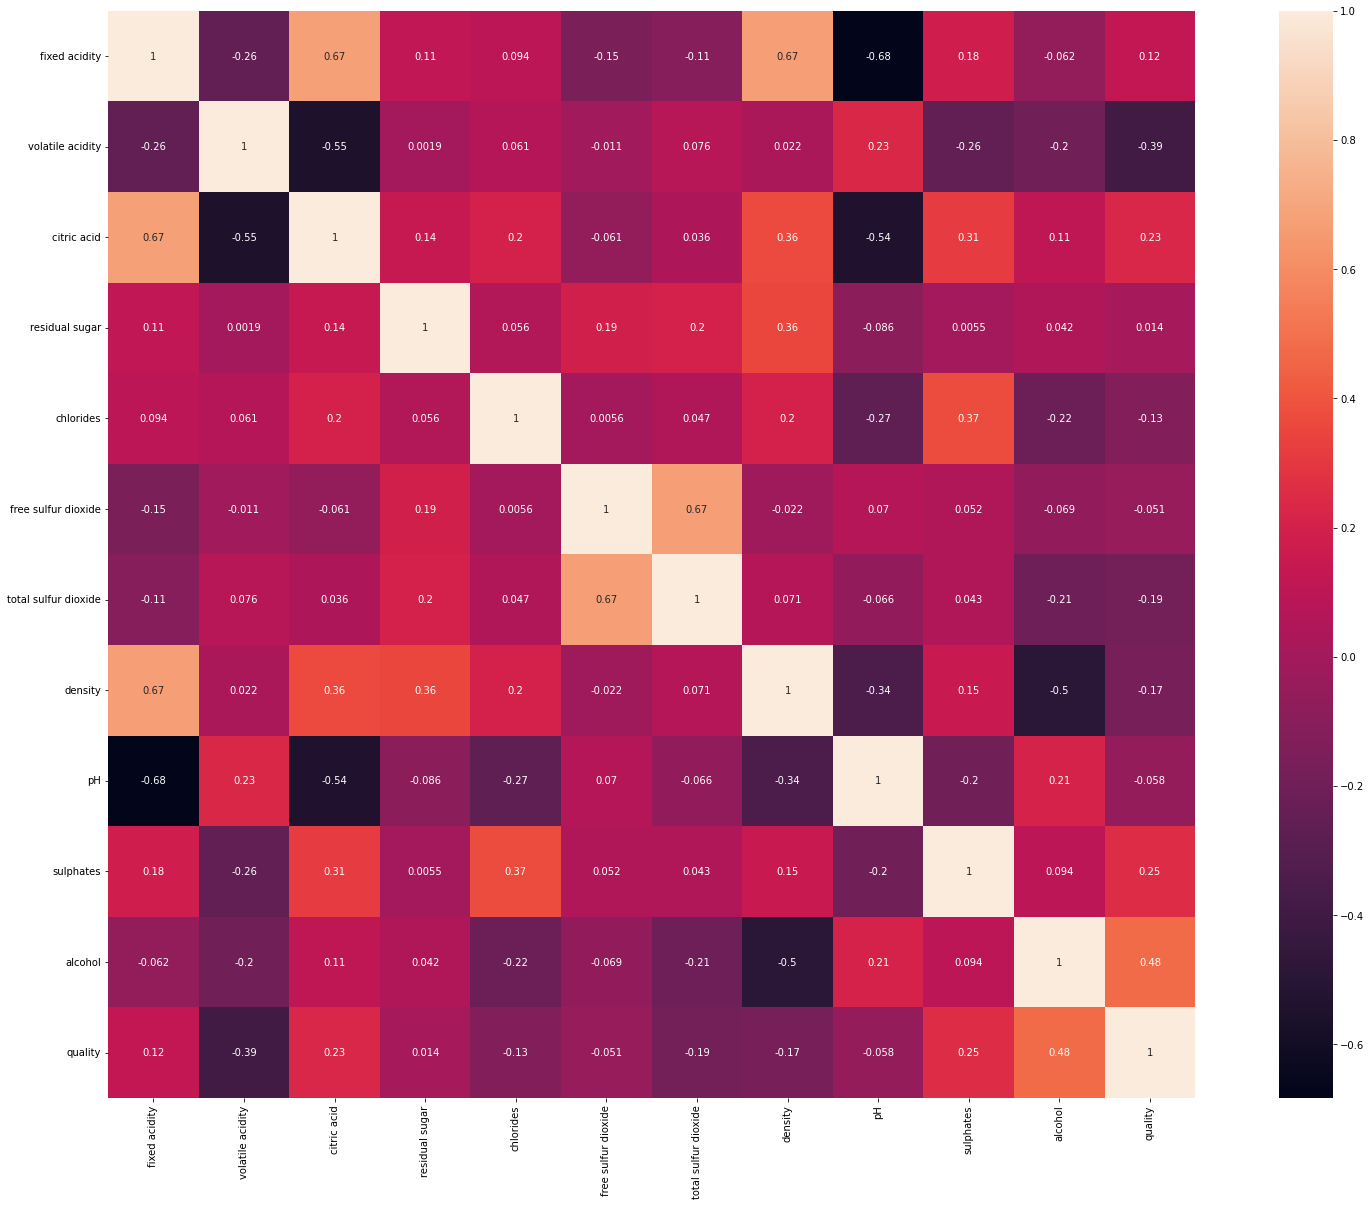

In [1385]:
# Correlation analysis
corrMatt = df_wine.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig, ax = pyplot.subplots()
fig.set_size_inches(30, 20)
sn.heatmap(corrMatt,  square=True, annot=True)

From the pairplot below, often, trends oh what makes a higher quality grade wine is shown. For example, there is a gradient within all alcohol plots, increasing in quality as alcohol percentage increases.

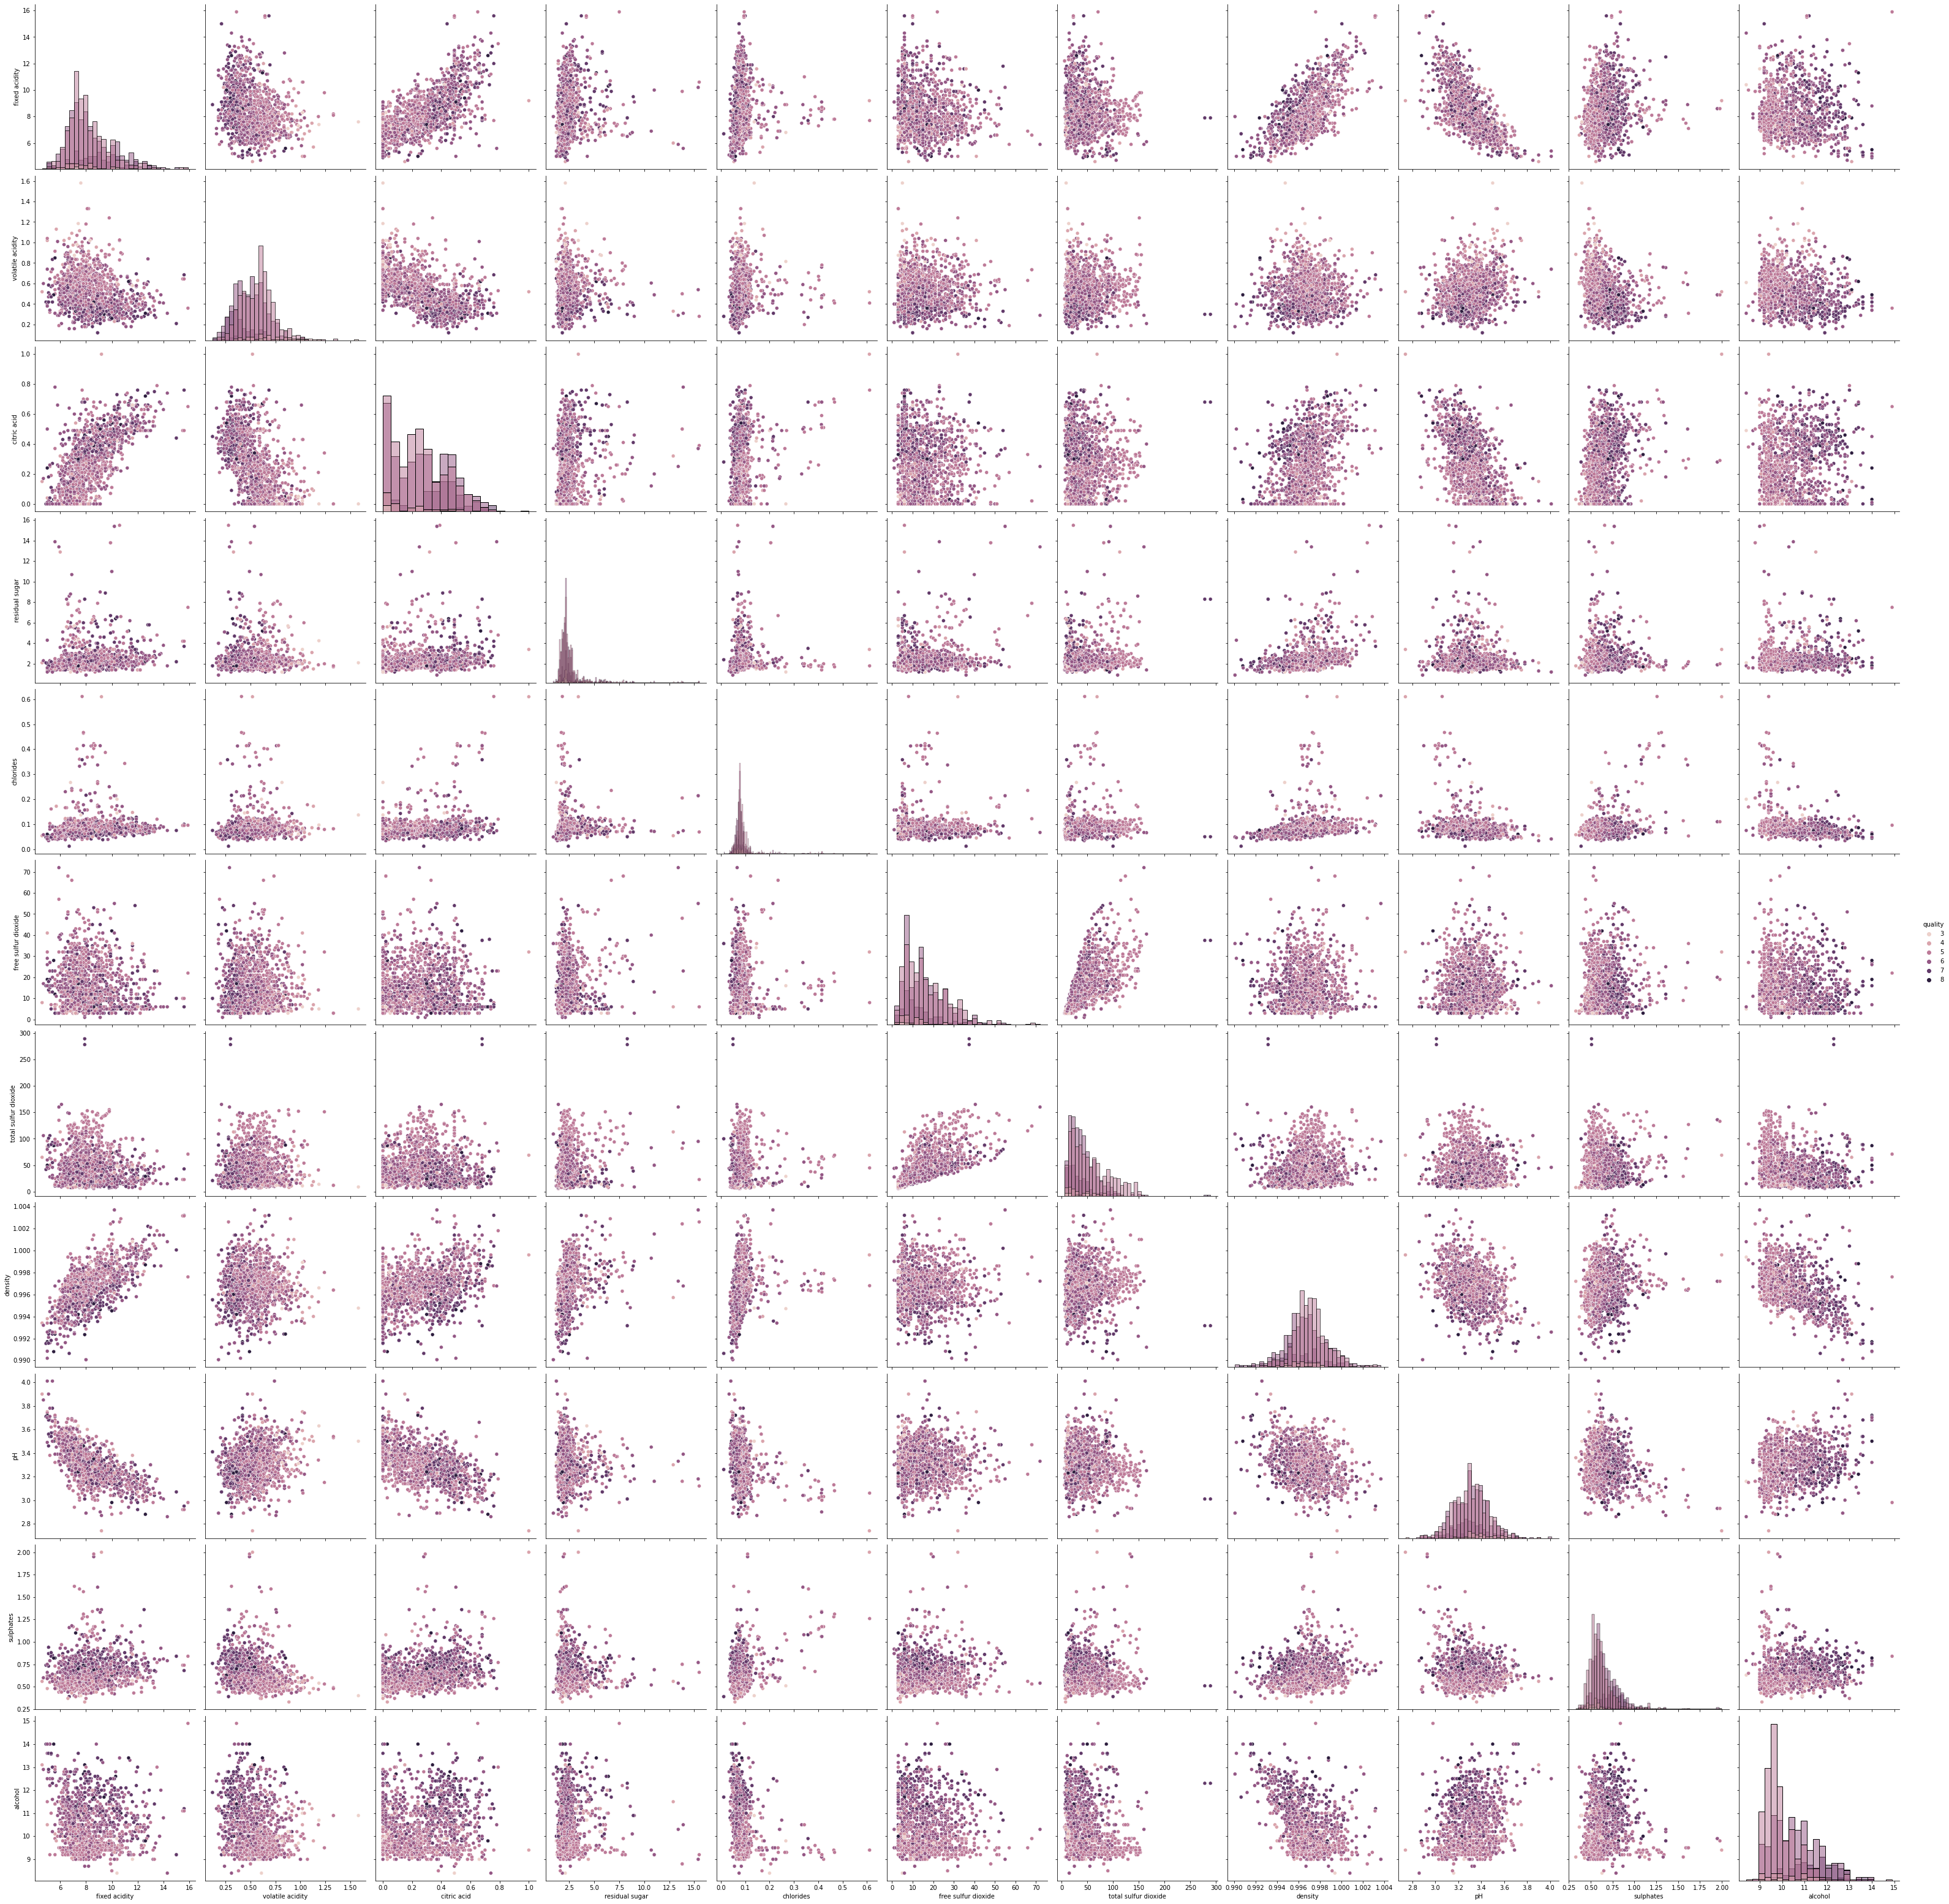

In [1386]:
sn.pairplot(df_wine, hue='quality', kind='scatter', diag_kind="hist", size=4)

#### StandardScaler

In [1387]:
from sklearn.preprocessing import StandardScaler
standard_scale = StandardScaler().fit_transform(features)

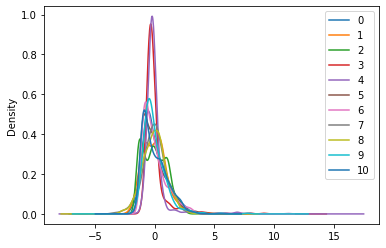

In [1388]:
pd.DataFrame(standard_scale).plot(kind='kde');

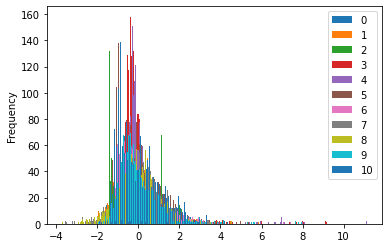

In [1389]:
pd.DataFrame(standard_scale).plot(kind='hist', bins=300);

#### MinMaxScaler

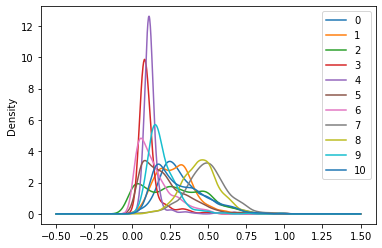

In [1390]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale = MinMaxScaler().fit_transform(features)
pd.DataFrame(min_max_scale).plot(kind='kde');

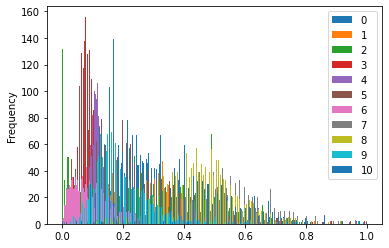

In [1391]:
pd.DataFrame(min_max_scale).plot(kind='hist', bins=300);

#### Comparison Feature scaling

**Observation:** from histogram/KDE, I have concluded to carry forward using the standard scaler as I believe it is better normalized. looking at the KDE, the density axis is better normalized/grouped than the minmax scaler. As for the histogram, the standard scaler has a better spread for negative values. To conclud, the standard scale is nicely normalized significantly compared to the minmax.


In [1392]:
features_scaled = standard_scale

### Modeling

Models Used are Multivariable Linear Regression(LR and Random Forest(RF). RF will strongly contend with the Neural Network, as they will both be drastically different to LR. I believe it could be possible that LR may not perform the best as the data has little correlation and will result in the RF and neural network to perform better.

In [1393]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [1394]:
#separate the other attributes from the predicting attribute
x = features_scaled
y = df_wine['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1395]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [1396]:
#Random Forest
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [1397]:
nn_model = Sequential([
    keras.layers.InputLayer(input_shape = [11]),
  Dense(512, activation=tf.nn.relu),
  Dense(200, activation=tf.nn.relu),
  Dense(100, activation=tf.nn.relu),
  Dense(10, activation=tf.nn.softmax)
])
nn_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = nn_model.fit(x_train, y_train, epochs=10, batch_size=1,validation_data=(x_test, y_test))

Epoch 1/10
1279/1279 [==============================] - 1s 748us/step - loss: 1.1262 - accuracy: 0.5504 - val_loss: 0.9846 - val_accuracy: 0.5594
Epoch 2/10
1279/1279 [==============================] - 1s 692us/step - loss: 1.0027 - accuracy: 0.5903 - val_loss: 0.9793 - val_accuracy: 0.5594
Epoch 3/10
1279/1279 [==============================] - 1s 722us/step - loss: 0.9683 - accuracy: 0.6028 - val_loss: 0.9828 - val_accuracy: 0.5688
Epoch 4/10
1279/1279 [==============================] - 1s 717us/step - loss: 0.9248 - accuracy: 0.6247 - val_loss: 0.9180 - val_accuracy: 0.5875
Epoch 5/10
1279/1279 [==============================] - 1s 708us/step - loss: 0.9161 - accuracy: 0.6177 - val_loss: 0.9322 - val_accuracy: 0.5781
Epoch 6/10
1279/1279 [==============================] - 1s 697us/step - loss: 0.8873 - accuracy: 0.6294 - val_loss: 0.9222 - val_accuracy: 0.5844
Epoch 7/10
1279/1279 [==============================] - 1s 708us/step - loss: 0.8697 - accuracy: 0.6427 - val_loss: 0.8965 -

### Model Evaluation

Evaluating the model accuracy is an essential part of the process in creating machine learning models to describe how well the model is performing in its predictions. Evaluation metrics change according to the problem type. Here, we'll briefly learn how to check the accuracy of the regression model.

The linear model (regression) can be a typical example of this type of problem, and the main characteristic of the regression problem is that the targets of a dataset contain the real numbers only. The errors represent how much the model is making mistakes in its prediction. The basic concept of accuracy evaluation is to compare the original target with the predicted one according to certain metrics.


**Regression model evaluation metrics**

The MAE, RMSE, and R-Squared metrics are mainly used to evaluate the prediction error rates and model performance in regression analysis.

**MAE (Mean absolute error)** represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

**RMSE (Root Mean Squared Error)** is the error rate by the square root of MSE.

**R-squared (Coefficient of determination)** represents the coefficient of how well the values fit compared to the original values. The value from 0 to 1 interpreted as percentages. The higher the value is, the better the model is.

The above metrics can be expressed as following:
<img src = "https://4.bp.blogspot.com/-wG7IbjTfE6k/XGUvqm7TCVI/AAAAAAAAAZU/vpH1kuKTIooKTcVlnm1EVRCXLVZM9cPNgCLcBGAs/s1600/formula-MAE-MSE-RMSE-RSquared.JPG">

Please find more information on how to implement them from this link: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Find more about feature importances from here: https://machinelearningmastery.com/calculate-feature-importance-with-python/

**Classification model evaluation metrics**

<img src="https://www.researchgate.net/publication/336402347/figure/fig3/AS:812472659349505@1570719985505/Calculation-of-Precision-Recall-and-Accuracy-in-the-confusion-matrix.ppm">

#### Evaluate Regression models


In [1398]:
#helper method to print metrics
def evaluate_model(name, model, x_test, y_test):
    start = time()
    pred = model.predict(x_test)
    end = time()
    r2 = round(r2_score(y_test, pred), 3)
    mae = round(mean_absolute_error(y_test, pred), 3)
    rmse = round(np.sqrt(mean_squared_error(y_test, pred)), 3)
    print('{0} -- R-Squared: {1:.2f} / RMSE: {2:.2f} / MAE: {3:.2f}'.format(name,
                                                                                   r2,
                                                                                   rmse,
                                                                                   mae))

#### Compare R-squared, RMSE, and MAE:
Random forest has the higher r-squared, making it the better model, this is due to its error rate being lower than the Linear model. The RMSE and MAE of both models are fairly high and demonstrate the high error rate of the models.

In [1399]:
evaluate_model("Linear Regression", lr, x_test, y_test)

Linear Regression -- R-Squared: 0.40 / RMSE: 0.62 / MAE: 0.50


In [1400]:
evaluate_model("Random Forest", rf, x_test, y_test)

Random Forest -- R-Squared: 0.52 / RMSE: 0.56 / MAE: 0.43


#### Feature Importance
Both models indicate that alcohol is the leading feature. Interestingly, Volatile acidity and sulphates are respectively second and third, however reverse between the models. Linear regression model has a gradual decline where as the random forest model plateaus with half the features marginally different. Lastly to note, prior to scaling the data, the coefficients were heavily skewed towards density. I felt it was incorrect and have since scaled the data.

<AxesSubplot:>

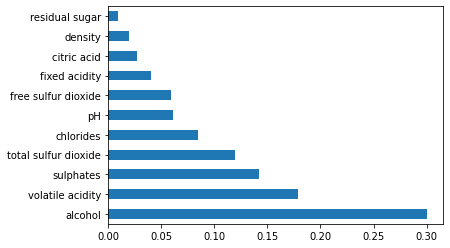

In [1401]:
importance = np.absolute(lr.coef_) # convert to absolute values
(pd.Series(importance, index=df_wine.drop(['quality'], axis=1).columns)
   .nlargest(11)
   .plot(kind='barh'))

<AxesSubplot:>

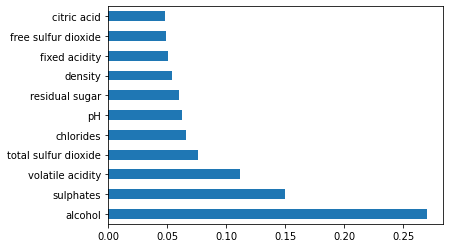

In [1402]:
(pd.Series(rf.feature_importances_, index=df_wine.drop(['quality'], axis=1).columns)
   .nlargest(11)
   .plot(kind='barh'))

### Evaluate Classification Model

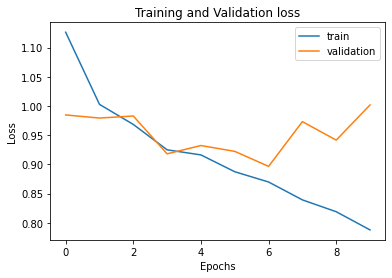

In [1403]:
#plot training loss and validation loss
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='validation')
pyplot.title('Training and Validation loss')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()

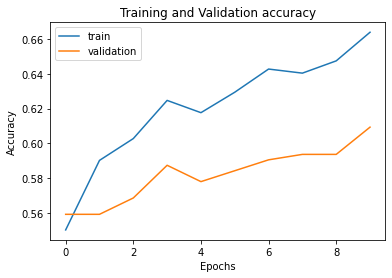

In [1404]:
#plot training accuracy and validation accuracy
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='validation')
pyplot.title('Training and Validation accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
pyplot.show()

In [1405]:
# evaluate the Neural Network model
y_pred1 = nn_model.predict(x_test)
y_pred = np.argmax(y_pred1, axis=1)

test_precision= precision_score(y_test, y_pred , average="macro")
test_recall=recall_score(y_test, y_pred , average="macro")
test_acc = accuracy_score(y_test, y_pred )

print('{0} -- Accuracy: {1:.2f} / Precision: {2:.2f} / Recall: {3:.2f}'.format("Neural Network",
                                                                                   test_acc,
                                                                                   test_precision,
                                                                                   test_recall))

Neural Network -- Accuracy: 0.61 / Precision: 0.31 / Recall: 0.28


### Conclusion
The results of the Regression Models and Classification Models on the Red Wine Quality Dataset is promising. The model are possible, and they do indicate some important features of a red wine. The alcohol level was determined to be the most important feature. However, if that was the only feature considered for the quality of the red wine, it would be extremely insufficient. Below the top 4 features, the current regression models do not strongly indicate the quality of the red wine which conflicts with intuition. For example, the residual sugar should be a strong indicator as the food industry overloads many foods with sugar and aggressively advertise to children with sugar loaded products. To be fair, the target audience is not sugar, but generally humans are addicted to sugar. As for the Classification Model, the neural network requires refinement. The losses in the validation indicate that the model needs improvement. The accuracy indicates the model improves with more training. The training vs validation are similar slope. With due time and data, the model proves it can strongly relate wine’s chemical properties for certification and quality assessment and assurance processes.


